In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, roc_curve, auc, precision_recall_curve
from scipy.stats import ks_2samp

In [2]:
import plotly.graph_objects as go

X, y = make_classification(
    n_samples = 1000,
    n_classes = 2,
    n_features = 3,
    n_informative = 3,
    n_redundant = 0,
    n_repeated = 0,
    n_clusters_per_class = 3, # The number of clusters per class. (?)    
    weights = [0.95, 0.05],
    flip_y = 0.01, # Instâncias que possuem a variável resposta atribuída de forma aleatória (50/50)
    random_state = 42
)

# Criar a figura
fig = go.Figure()

# Adicionar o gráfico de pontos 3D
fig.add_trace(go.Scatter3d(
    x=X[:, 0],
    y=X[:, 1],
    z=X[:, 2],
    mode='markers',  # Define o tipo de marcador
    marker=dict(
        size=12,  # Define o tamanho dos marcadores
        color=y,  # Define a cor dos marcadores de acordo com o eixo z
        opacity=0.5,  # Define a opacidade dos marcadores
        colorscale = 'Rainbow'
    )
))

# Adicionar rótulos aos eixos
fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z'
))

# Exibir o gráfico
fig.show()


In [3]:
np.random.seed(42)

resultados_performance = pd.DataFrame({
        'Acurácia' : [],
        'Precisão' : [],
        'Recall' : [],
        'F1-Score' : [],
        'ROC AUC' : [],
        'Pr-Re AUC' : []
    })

for x in np.arange(0.5, 0.001, -0.01): # 0.01
    print(x)
    
    acuracia = np.array([])
    precisao = np.array([])
    recall = np.array([])
    f1 = np.array([])
    roc_auc = np.array([])
    ks_score = np.array([])
    
    for simulacao in range(5):
    
        X, y = make_classification(
            n_samples = 10000,
            n_classes = 2,
            n_features = 20,
            n_informative = 20,
            n_redundant = 0,
            n_repeated = 0,
            n_clusters_per_class = 3, # The number of clusters per class. (?)    
            weights = [1-x, x],
            flip_y = 0.01 # Instâncias que possuem a variável resposta atribuída de forma aleatória (50/50)
        )
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, stratify = y)

        lr = LogisticRegression(
            penalty = None,
            class_weight = None, # adicionar a teoria por trás desse parâmetro
            n_jobs = -1, # Usa todos os núcleos do processador
            solver = 'lbfgs' # Algorithm to use in the optimization problem
        )

        lr.fit(X_train, y_train)

        y_pred_proba = lr.predict_proba(X_test)[:, 1:]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        melhor_ponto_corte = thresholds[np.argmax(tpr - fpr)]
        y_pred = np.array([1 if y_prob >= melhor_ponto_corte else 0 for y_prob in y_pred_proba])
        
        # precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
        # f1_scores =  2 * (precision * recall) / (precision + recall)
        # melhor_ponto_corte = thresholds[np.argmax(f1_scores)]
        # y_pred = np.array([1 if y_prob >= melhor_ponto_corte else 0 for y_prob in y_pred_proba])
        
        row_name = f'LR (Tx Evento: {str(round(x, 3))})'
        
        acuracia = np.append(acuracia, accuracy_score(y_test, y_pred))
        precisao = np.append(precisao, precision_score(y_test, y_pred, zero_division = 0))
        recall = np.append(recall, recall_score(y_test, y_pred, zero_division = 0))
        f1 = np.append(f1, f1_score(y_test, y_pred, zero_division = 0))
        roc_auc = np.append(roc_auc, roc_auc_score(y_test, y_pred_proba))
        
        precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
        # Calcule a área sob a curva de precisão-recall
        precision_recall_auc = auc(recall, precision)


    resultados_performance.loc[row_name, :] = [
        acuracia.mean(),
        precisao.mean(),
        recall.mean(),
        f1.mean(),
        roc_auc.mean(),
        precision_recall_auc
    ]

    resultados_performance

resultados_performance

0.5
0.49
0.48
0.47
0.45999999999999996
0.44999999999999996
0.43999999999999995
0.42999999999999994
0.41999999999999993
0.4099999999999999
0.3999999999999999
0.3899999999999999
0.3799999999999999
0.3699999999999999
0.3599999999999999
0.34999999999999987
0.33999999999999986
0.32999999999999985
0.31999999999999984
0.30999999999999983
0.2999999999999998
0.2899999999999998
0.2799999999999998
0.2699999999999998
0.2599999999999998
0.24999999999999978
0.23999999999999977
0.22999999999999976
0.21999999999999975
0.20999999999999974
0.19999999999999973
0.18999999999999972
0.17999999999999972
0.1699999999999997
0.1599999999999997
0.1499999999999997
0.13999999999999968
0.12999999999999967
0.11999999999999966
0.10999999999999965
0.09999999999999964
0.08999999999999964
0.07999999999999963
0.06999999999999962
0.05999999999999961
0.0499999999999996
0.03999999999999959
0.029999999999999583
0.019999999999999574
0.009999999999999565


,Acurácia,Precisão,Recall,F1-Score,ROC AUC,Pr-Re AUC
LR (Tx Evento: 0.5),0.777467,0.773965,0.665499,0.778312,0.852680,0.835219
LR (Tx Evento: 0.49),0.768267,0.762025,0.684787,0.763266,0.844628,0.855706
LR (Tx Evento: 0.48),0.765133,0.751701,0.666635,0.757699,0.836000,0.777642
LR (Tx Evento: 0.47),0.792000,0.795390,0.707967,0.774942,0.864122,0.893269
LR (Tx Evento: 0.46),0.761000,0.733536,0.696282,0.741586,0.835770,0.831691
LR (Tx Evento: 0.45),0.770600,0.738124,0.710695,0.745999,0.841687,0.828090
LR (Tx Evento: 0.44),0.753800,0.717129,0.683317,0.724218,0.823132,0.794680
LR (Tx Evento: 0.43),0.755867,0.705211,0.698602,0.725158,0.827362,0.806614
LR (Tx Evento: 0.42),0.759000,0.702895,0.696160,0.722615,0.833574,0.790555
LR (Tx Evento: 0.41),0.759867,0.731277,0.683962,0.691493,0.812201,0.791854


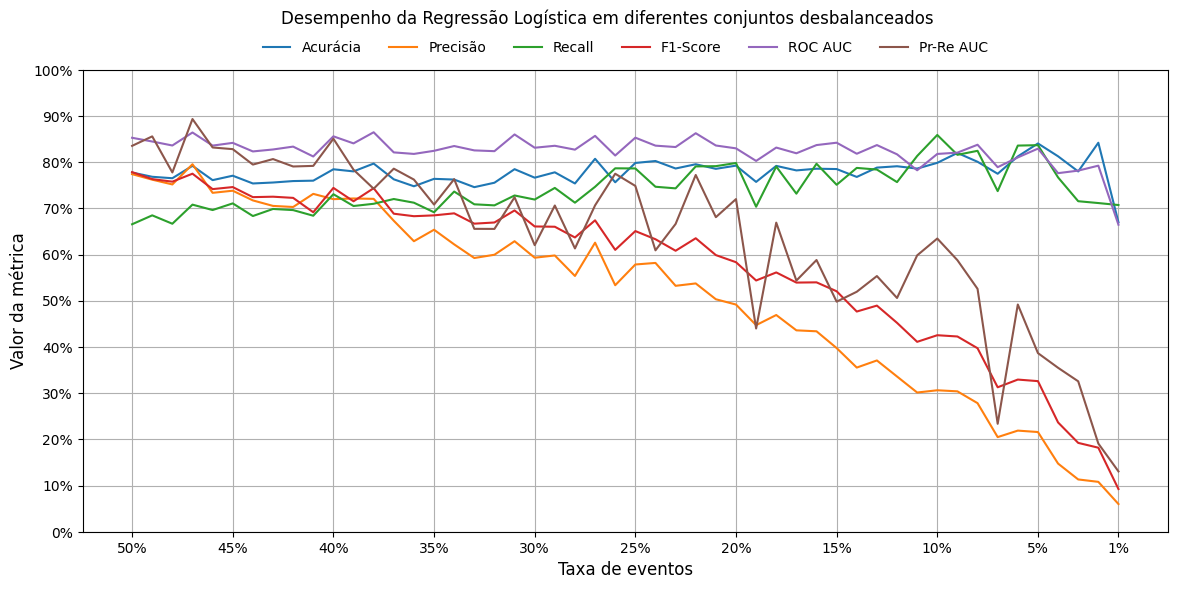

In [4]:
resultados_performance.plot(
    figsize = (14, 6)
)


plt.grid()
plt.suptitle('Desempenho da Regressão Logística em diferentes conjuntos desbalanceados')
plt.legend(loc = 'upper center', ncols = 10, bbox_to_anchor=(0.5, 1.09), frameon = False)
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 49], ['50%', '45%', '40%', '35%', '30%', '25%', '20%', '15%', '10%', '5%', '1%'])
plt.yticks(
    [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 
    ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%']
)
plt.xlabel('Taxa de eventos', fontsize = 12)
plt.ylabel('Valor da métrica', fontsize = 12)
plt.show()

resultados_performance.to_csv(
    r"G:\Meu Drive\Dissertacao\Gráficos\Regressão Logística em dados desbalanceados\performance_modelos_lr.csv"
)

---